# **The necessary libraries have been imported.**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import zipfile

# **Unzip a ZIP file and convert its contents to a folder.**

In [2]:
zip_file_path = "/content/archive.zip"
extraction_path = "/content/orl_faces"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Data extracted to:", extraction_path)

Data extracted to: /content/orl_faces


**The main data path is set and the input image size is set to (92x112).**

In [3]:
data_dir =  "/content/orl_faces"
img_size = (92, 112)

In [4]:
# Prepare data
X = []  # Images
y = []  # Labels

# **Upload images from folders, process them, and categorize them.**

In [7]:
for label, folder in enumerate(sorted(os.listdir(data_dir))):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = load_img(img_path, target_size=img_size, color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize
            X.append(img_array)
            y.append(label)


X = np.array(X)
y = np.array(y)

This code processes a dataset of images organized in subfolders (one folder per class) and prepares it for training a machine learning model. Here's what it does:


1.   Iterates through each folder in the dataset directory (data_dir), where each folder represents a class.
2.   Assigns a numerical label to each folder using the enumerate() function.
3. For each image file in the folder:

  - Constructs the full path to the image file.

  - Loads the image, resizes it to a fixed dimension (img_size), and converts it to grayscale.

  - Converts the image to a NumPy array and normalizes its pixel values to the range [0, 1].

  - Adds the processed image to the list X and its corresponding label to the list y.

4. Result
  - X: A list of all images as normalized NumPy arrays
  - y: A list of corresponding numerical labels.







# Troubleshooting in Categories

In [8]:
# Verify label range and correct if needed
num_classes = 40
if np.max(y) >= num_classes:
    print(f"Labels before correction: {np.unique(y)}")
    y = np.where(y >= num_classes, num_classes - 1, y)
    print(f"Labels after correction: {np.unique(y)}")

Labels before correction: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Labels after correction: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


# **Data partitioning:**

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# **Display images**

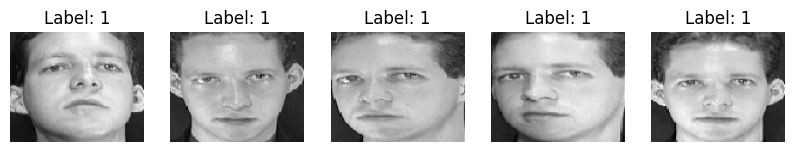

In [11]:
# Display a few sample images and labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

# **Building a Convolutional Neural Network (CNN) Model**

In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(112, 92, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(40, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Assemble the model**

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Model training**

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - accuracy: 0.0394 - loss: 3.7436 - val_accuracy: 0.0938 - val_loss: 3.4749
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 533ms/step - accuracy: 0.1493 - loss: 3.2398 - val_accuracy: 0.6094 - val_loss: 2.1697
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 546ms/step - accuracy: 0.4679 - loss: 2.0449 - val_accuracy: 0.8490 - val_loss: 0.9482
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.7211 - loss: 1.0627 - val_accuracy: 0.9375 - val_loss: 0.3187
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 579ms/step - accuracy: 0.8183 - loss: 0.6496 - val_accuracy: 0.9740 - val_loss: 0.1541
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step - accuracy: 0.8832 - loss: 0.4169 - val_accuracy: 0.9896 - val_loss: 0.1350
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 557ms/step - accuracy: 0.9263 - loss: 0.2477 - val_accuracy: 0.9896 - val_loss: 0.0857
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.9197 - loss: 0.3032 - val_accu

# **Model Evaluation**

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9912 - loss: 0.0362
Test Accuracy: 98.33%
